<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/histogram/hi_color_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/TKC/1')
!ls -a

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
2300.png  2389.png  2478.png  2567.png	2656.png  2802.png  2892.png  2983.png
2301.png  2390.png  2479.png  2568.png	2657.png  2803.png  2893.png  2984.png
2302.png  2391.png  2480.png  2569.png	2658.png  2804.png  2894.png  2985.png
2303.png  2392.png  2481.png  2570.png	2659.png  2805.png  2895.png  2986.png
2304.png  2393.png  2482.png  2571.png	2660.png  2806.png  2896.png  2987.png
2305.png  2394.png  2483.png  2572.png	2661.png  2807.png  2897.png  2988.png
2306.png  2395.png  2484.png  2573.png	2662.png  2808.png  2898.png  2989.png
2307.png  2396.png  2485.png  2574.png	2663.png  2809.png  2899.png  2990.png
2308.png  2397.png  2486.png  2575.png	2664.png  2810.png  2900.png  2991.png
2309.png  2398.png  2487.png  2576.png	2665.png  2811.png  2901.png  2992.png
2310.png  2399.png  2488.png  2577.png	2666.png  2812.png  2902.png  2993.png
2311.png  2

In [31]:
# import the necessary packages
from imutils.perspective import four_point_transform
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [32]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [33]:
def find_color_card(image):
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# detect the markers in the input image
	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)

	# try to extract the coordinates of the color correction card
	try:
		# otherwise, we've found the four ArUco markers, so we can
		# continue by flattening the ArUco IDs list
		ids = ids.flatten()

		# extract the top-left marker
		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]

		# extract the top-right marker
		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]

		# extract the bottom-right marker
		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]

		# extract the bottom-left marker
		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]

	# we could not find color correction card, so gracefully return
	except:
		return None

	# build our list of reference points and apply a perspective
	# transform to obtain a top-down, birds-eye-view of the color
	# matching card
	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)

	# return the color matching card to the calling function
	return card

In [35]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "reference": "2300.png",
    "input": "2301.png"
}

[INFO] loading images...


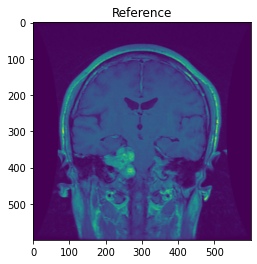

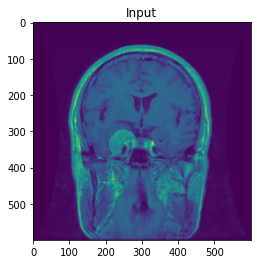

In [36]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [37]:
# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...
[INFO] could not find color matching card in both images


In [39]:
# show the color matching card in the reference image and input image,
# respectively
#plt_imshow("Reference Color Card", refCard)
#plt_imshow("Input Color Card", imageCard)

# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
#print("[INFO] matching images...")
#imageCard = exposure.match_histograms(imageCard, refCard,
#	multichannel=True)

# show our input color matching card after histogram matching
#plt_imshow("Input Color Card After Matching", imageCard)